<a href="https://colab.research.google.com/github/ratataca/data-analysis/blob/main/world%2Bcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install konlpy
# !pip install nltk
# !pip install wordcloud

     |████████████████████████████████| 19.4 MB 9.2 MB/s 
     |████████████████████████████████| 448 kB 45.1 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("article.csv")
df.tail(1)

,sectionId,articleId,officeId,officeName,title,summary,link,content
179,104,11023866,3,뉴시스,"""러시아, 침공에 필요한 병력 100% 우크라 국경지대에 집결""","기사내용 요약 ""전반적인 작전 능력 갖춰…80% 병력 공격태세"" [서울=뉴시스] 문...",https://news.naver.com/main/read.naver?mode=LS...,"기사내용 요약""전반적인 작전 능력 갖춰…80% 병력 공격태세""러시아가 22일(현지시..."


In [ ]:
text = "".join(df['title'].values)
len(text), text[:50]

(6104, '러, 오늘밤 가기 전 전면 공격? 美 국무 "네, 러시아 마지막 준비 마쳐"[종합]美 국무')

In [ ]:
# 형태소 분석기

In [ ]:
okt = Okt()

In [ ]:
# 형태소 분석기 마다 약간의 차이는 있다.
%%time
nouns = okt.nouns(text)

CPU times: user 14.9 s, sys: 465 ms, total: 15.4 s
Wall time: 8.58 s


In [ ]:
nouns[:10]

['오늘밤', '가기', '전', '전면', '공격', '국무', '네', '러시아', '마지막', '준비']

In [ ]:
%%time
pos = okt.pos(text)

CPU times: user 1.49 s, sys: 106 ms, total: 1.6 s
Wall time: 859 ms


In [ ]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [ ]:
pos

In [ ]:
# 동사만 출력 - 특정 품사 뽑기
verbs = [word for word, tagset in pos if tagset == "Verb"]
verbs[30:60]

['크라',
 '넘는',
 '대',
 '뺀',
 '막는다',
 '크라',
 '는',
 '만나',
 '펼쳐야',
 '크라',
 '친러',
 '밟나',
 '크라',
 '할',
 '크라',
 '걸려야',
 '푼다',
 '크라',
 '크라',
 '막히나',
 '이어',
 '꺼내',
 '들었',
 '다루',
 '끝나기',
 '크라',
 '할',
 '크라',
 '할',
 '크라']

In [ ]:
# world cloud 만들기

# 1. 명사만 뽑아서 
article = Text(nouns, name="article")
datas = article.vocab()
datas

FreqDist({'가격': 4,
          '가기': 1,
          '가능': 4,
          '가능성': 4,
          '가사': 1,
          '가스': 10,
          '가입': 1,
          '가장': 1,
          '가즈프롬': 5,
          '갈등': 1,
          '감수': 1,
          '감염': 3,
          '값': 3,
          '강세': 1,
          '강의': 1,
          '강제': 1,
          '개입': 1,
          '거부': 1,
          '건': 1,
          '건설': 3,
          '검사': 2,
          '검토': 4,
          '것': 3,
          '겨냥': 2,
          '격퇴': 5,
          '결정': 2,
          '경고': 2,
          '경제': 1,
          '계속': 1,
          '고급': 1,
          '고조': 5,
          '곤혹': 1,
          '골드만삭스': 1,
          '골수': 1,
          '곳': 1,
          '공개': 1,
          '공격': 15,
          '공급망': 1,
          '공장': 2,
          '공조': 1,
          '관': 6,
          '관계': 2,
          '관련': 2,
          '관료': 1,
          '관사': 3,
          '관측': 2,
          '교민': 1,
          '교통': 1,
          '구미': 1,
          '구역': 1,
          '국': 2,
          '국가': 5,
         

In [ ]:
datas
'''
FreqDist({'가격': 4,
          '가기': 1,
          '가능': 4,
          '가능성': 4,
          '가사': 1,
          '가스': 10,
          '가입': 1,
          '가장': 1,
          '가즈프롬': 3
'''

"\nFreqDist({'가격': 4,\n          '가기': 1,\n          '가능': 4,\n          '가능성': 4,\n          '가사': 1,\n          '가스': 10,\n          '가입': 1,\n          '가장': 1,\n          '가즈프롬': 3\n"

In [ ]:
# 2. D2coding 글씨체 이용해서 wc 만들기
wc = WordCloud(font_path="D2Coding.ttf", background_color="white")

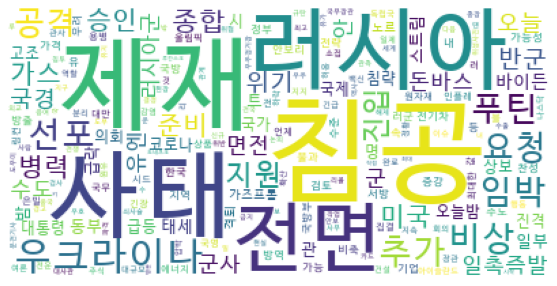

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(datas))
plt.axis('off')
plt.show()

In [ ]:
# 불필요한 단어 제거

In [ ]:
stop_words = ["추가"]

words = dict(datas)

for stop_word in stop_words:
    print(stop_word)
    del words[stop_word]

추가


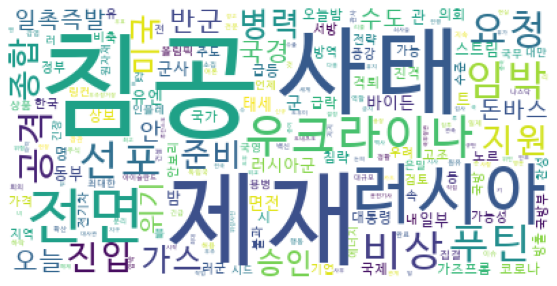

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()

In [ ]:
# 나의 과제

In [ ]:
df = pd.read_csv("fit_2022.csv")
df.tail(1)

,Unnamed: 0,userId,title,content,registerDate,modifyDate,buyOption,qualityScore,starScore,mallName,buyOption.1,imageYn
619,79,l*j*****,스칼렛 색상이랑 블랙이랑 고민했는데,<em>스칼렛 색상이랑 블랙이랑 고민했는데</em> 밴드는 교체 가능해서 블랙 구매...,2022-01-23,2022-01-23,블랙=SM-R220NZKAKOO,0.718982,5,롯데ON,블랙=SM-R220NZKAKOO,Y


(192867, '이번에 할인 행사를 많이 하길래, 아버지 생신 선물로 미리 사드렸습니다. 아버지께서 운동을')

In [ ]:
nouns[:10]

['이번', '할인', '행사', '아버지', '생신', '선물', '미리', '사', '아버지', '운동']

In [ ]:
df = pd.read_csv("fit_2022.csv")
df.tail(1)

text = "".join(df['content'].values)
len(text), text[:50]

okt = Okt()

# 형태소 분석기 마다 약간의 차이는 있다.
%%time
nouns = okt.nouns(text)

# world cloud 만들기

# 1. 명사만 뽑아서 
article = Text(nouns, name="article")
datas = article.vocab()

In [ ]:
# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(2555,2275), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('mycat.jfif').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

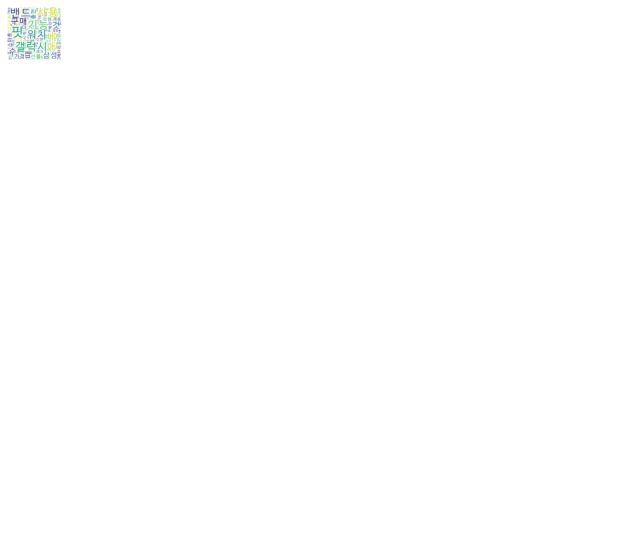

In [ ]:
# 2. D2coding 글씨체 이용해서 wc 만들기
wc = WordCloud(font_path="D2Coding.ttf", background_color="white", mask=mask)

plt.figure(figsize=(20, 10))

plt.imshow(wc.generate_from_frequencies(datas))
plt.axis('off')
plt.savefig('상암맛집.png', bbox_inches='tight')
plt.show()


In [ ]:
# 불필요 단어 제거
stop_words = ["더", "개", "용", "안", "알", "딜", "걸", "요", "것", "게"]

words = dict(datas)

for stop_word in stop_words:
    print(stop_word)
    try:
        del words[stop_word]
    except:
        pass

더
개
용
안
알
딜
걸
요
것
게


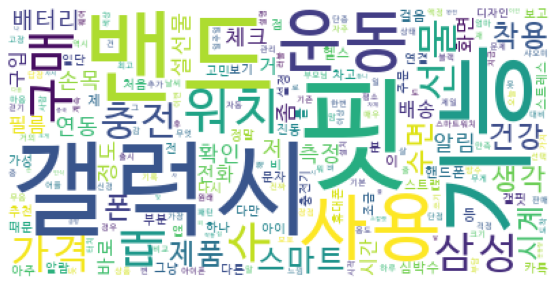

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()

## 테스트

In [ ]:
df = pd.read_csv("fit_2022.csv")
df.tail(1)

text = "".join(df['content'].values)
len(text), text[:50]

okt = Okt()


In [ ]:
# 형태소 분석기 마다 약간의 차이는 있다.
%%time
nouns = okt.nouns(text)

# world cloud 만들기

# 1. 명사만 뽑아서 
article = Text(nouns, name="article")
datas = article.vocab()
datas

CPU times: user 15.2 s, sys: 48.3 ms, total: 15.3 s
Wall time: 10.5 s


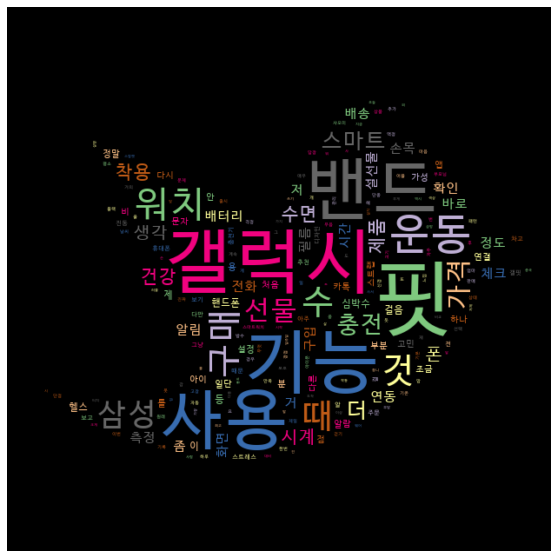

In [ ]:
mask = np.array(Image.open("bird.jpg"))


# 2. D2coding 글씨체 이용해서 wc 만들기
wc = WordCloud(max_words=1000, mask=mask, font_path="D2Coding.ttf", margin=10, background_color="black", colormap='Accent')

plt.figure(figsize=(20, 10))
plt.imshow(wc.generate_from_frequencies(datas), interpolation="bilinear")
plt.axis('off')
plt.show()